<a href="https://colab.research.google.com/github/RojTanakorn/Deep-Learning-Study/blob/master/2.%20Basic%20DL-Dropout_DataAugmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Dropout, Data Augmentation**

### **Import and preprocess data**

Import libraries

In [1]:
import tensorflow as tf
from tensorflow import keras

import numpy as np
import matplotlib.pyplot as plt

Load MNIST dataset

In [2]:
(X_train, y_train), (X_test, y_test) = keras.datasets.mnist.load_data()

# Only 2,000 samples of training data
X_train_2000 = X_train[:2000]
y_train_2000 = y_train[:2000]

11493376/11490434 [==============================] - 0s 0us/step


In [3]:
np.unique(y_train_2000, return_counts=True)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8),
 array([191, 220, 198, 191, 214, 180, 200, 224, 172, 210]))

In [4]:
print(f'X_train shape: {X_train_2000.shape}')
print(f'y_train shape: {y_train_2000.shape}')
print(f'X_test shape: {X_test.shape}')
print(f'y_test shape: {y_test.shape}')

X_train shape: (2000, 28, 28)
y_train shape: (2000,)
X_test shape: (10000, 28, 28)
y_test shape: (10000,)


Normalize data

In [5]:
X_train_2000, X_test = X_train_2000/255., X_test/255.

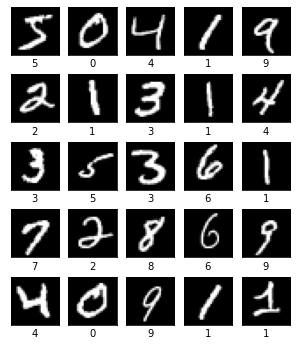

In [6]:
plt.figure(figsize=(5,6))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X_train_2000[i], cmap=plt.cm.gray)
    plt.xlabel(y_train_2000[i])

### **Homework 2.1 เปรียบเทียบการใช้ Dropout ที่มี Probability ที่ต่างกัน**

##### dropout prob. = 0 (no dropout)

In [7]:
default_model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(512, activation='relu'),
    keras.layers.Dense(512, activation='relu'),
    keras.layers.Dense(512, activation='relu'),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

default_model.compile(optimizer='adam',
                      loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True),
                      metrics=['accuracy'])

In [8]:
h_default_model = default_model.fit(X_train_2000, y_train_2000, epochs=20, validation_data=(X_test, y_test))

Epoch 1/20
63/63 [==============================] - 1s 12ms/step - loss: 1.8734 - accuracy: 0.6085 - val_loss: 1.7517 - val_accuracy: 0.7101
Epoch 2/20
63/63 [==============================] - 1s 10ms/step - loss: 1.7192 - accuracy: 0.7440 - val_loss: 1.7233 - val_accuracy: 0.7363
Epoch 3/20
63/63 [==============================] - 1s 11ms/step - loss: 1.6570 - accuracy: 0.8055 - val_loss: 1.6371 - val_accuracy: 0.8246
Epoch 4/20
63/63 [==============================] - 1s 10ms/step - loss: 1.5979 - accuracy: 0.8665 - val_loss: 1.6146 - val_accuracy: 0.8486
Epoch 5/20
63/63 [==============================] - 1s 10ms/step - loss: 1.5577 - accuracy: 0.9060 - val_loss: 1.6407 - val_accuracy: 0.8195
Epoch 6/20
63/63 [==============================] - 1s 11ms/step - loss: 1.5549 - accuracy: 0.9060 - val_loss: 1.6110 - val_accuracy: 0.8503
Epoch 7/20
63/63 [==============================] - 1s 11ms/step - loss: 1.5376 - accuracy: 0.9215 - val_loss: 1.5740 - val_accuracy: 0.8878
Epoch 8/20
63

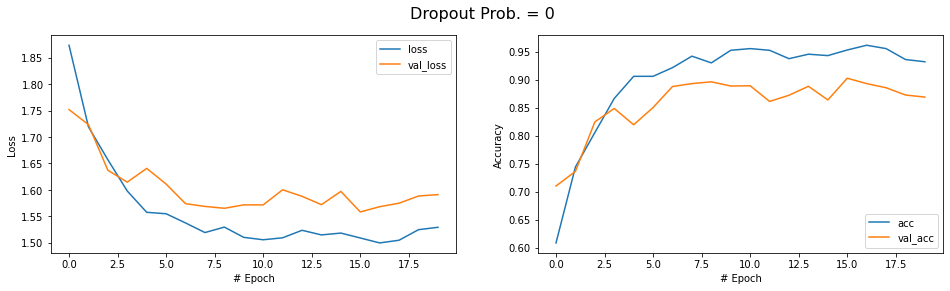

In [9]:
plt.figure(figsize=(16,4))
plt.suptitle('Dropout Prob. = 0', fontsize=16)
plt.subplot(1,2,1)
plt.plot(h_default_model.history['loss'], label='loss')
plt.plot(h_default_model.history['val_loss'], label='val_loss')
plt.xlabel('# Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper right')

plt.subplot(1,2,2)
plt.plot(h_default_model.history['accuracy'], label='acc')
plt.plot(h_default_model.history['val_accuracy'], label='val_acc')
plt.xlabel('# Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')

##### dropout prob. = 0.2

In [10]:
drop_20_model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(512, activation='relu'),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(512, activation='relu'),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(512, activation='relu'),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(10, activation='softmax')
])

drop_20_model.compile(optimizer='adam',
                      loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True),
                      metrics=['accuracy'])

In [11]:
h_drop_20_model = drop_20_model.fit(X_train_2000, y_train_2000, epochs=20, validation_data=(X_test, y_test))

Epoch 1/20
63/63 [==============================] - 1s 12ms/step - loss: 1.9581 - accuracy: 0.5135 - val_loss: 1.7308 - val_accuracy: 0.7318
Epoch 2/20
63/63 [==============================] - 1s 12ms/step - loss: 1.6878 - accuracy: 0.7815 - val_loss: 1.6322 - val_accuracy: 0.8322
Epoch 3/20
63/63 [==============================] - 1s 11ms/step - loss: 1.5990 - accuracy: 0.8640 - val_loss: 1.6686 - val_accuracy: 0.7940
Epoch 4/20
63/63 [==============================] - 1s 11ms/step - loss: 1.5762 - accuracy: 0.8850 - val_loss: 1.5751 - val_accuracy: 0.8871
Epoch 5/20
63/63 [==============================] - 1s 10ms/step - loss: 1.5649 - accuracy: 0.8990 - val_loss: 1.5969 - val_accuracy: 0.8633
Epoch 6/20
63/63 [==============================] - 1s 10ms/step - loss: 1.5611 - accuracy: 0.9005 - val_loss: 1.5905 - val_accuracy: 0.8708
Epoch 7/20
63/63 [==============================] - 1s 11ms/step - loss: 1.5459 - accuracy: 0.9150 - val_loss: 1.5905 - val_accuracy: 0.8703
Epoch 8/20
63

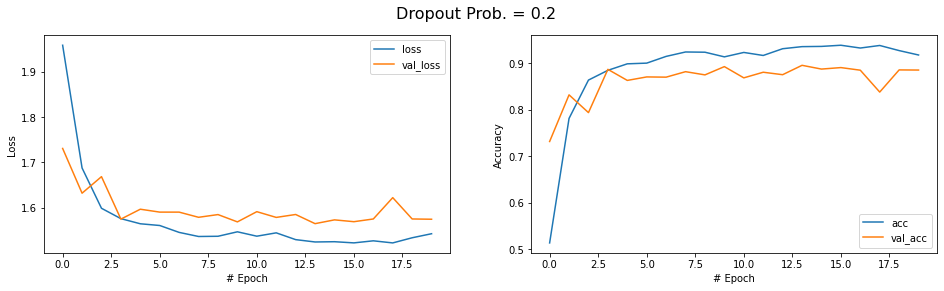

In [12]:
plt.figure(figsize=(16,4))
plt.suptitle('Dropout Prob. = 0.2', fontsize=16)
plt.subplot(1,2,1)
plt.plot(h_drop_20_model.history['loss'], label='loss')
plt.plot(h_drop_20_model.history['val_loss'], label='val_loss')
# plt.ylim(1.5, 1.73)
plt.xlabel('# Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper right')

plt.subplot(1,2,2)
plt.plot(h_drop_20_model.history['accuracy'], label='acc')
plt.plot(h_drop_20_model.history['val_accuracy'], label='val_acc')
# plt.ylim(0.7, 0.95)
plt.xlabel('# Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')

##### dropout prob. = 0.5

In [13]:
drop_50_model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(512, activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(512, activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(512, activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(10, activation='softmax')
])

drop_50_model.compile(optimizer='adam',
                      loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True),
                      metrics=['accuracy'])

In [14]:
h_drop_50_model = drop_50_model.fit(X_train_2000, y_train_2000, epochs=20, validation_data=(X_test, y_test))

Epoch 1/20
63/63 [==============================] - 1s 13ms/step - loss: 2.2294 - accuracy: 0.2175 - val_loss: 1.9857 - val_accuracy: 0.5251
Epoch 2/20
63/63 [==============================] - 1s 11ms/step - loss: 1.9434 - accuracy: 0.5190 - val_loss: 1.8258 - val_accuracy: 0.6330
Epoch 3/20
63/63 [==============================] - 1s 11ms/step - loss: 1.8434 - accuracy: 0.6130 - val_loss: 1.8057 - val_accuracy: 0.6526
Epoch 4/20
63/63 [==============================] - 1s 11ms/step - loss: 1.8085 - accuracy: 0.6500 - val_loss: 1.7311 - val_accuracy: 0.7293
Epoch 5/20
63/63 [==============================] - 1s 11ms/step - loss: 1.7614 - accuracy: 0.6980 - val_loss: 1.7428 - val_accuracy: 0.7130
Epoch 6/20
63/63 [==============================] - 1s 12ms/step - loss: 1.7286 - accuracy: 0.7345 - val_loss: 1.7001 - val_accuracy: 0.7577
Epoch 7/20
63/63 [==============================] - 1s 12ms/step - loss: 1.7038 - accuracy: 0.7570 - val_loss: 1.6630 - val_accuracy: 0.7968
Epoch 8/20
63

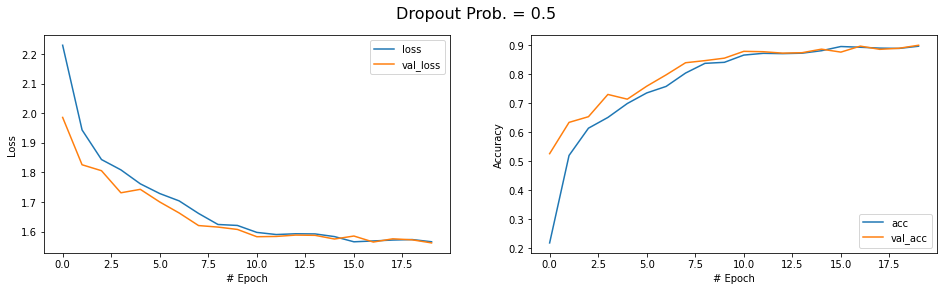

In [15]:
plt.figure(figsize=(16,4))
plt.suptitle('Dropout Prob. = 0.5', fontsize=16)
plt.subplot(1,2,1)
plt.plot(h_drop_50_model.history['loss'], label='loss')
plt.plot(h_drop_50_model.history['val_loss'], label='val_loss')
# plt.ylim(1.5, 1.73)
plt.xlabel('# Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper right')

plt.subplot(1,2,2)
plt.plot(h_drop_50_model.history['accuracy'], label='acc')
plt.plot(h_drop_50_model.history['val_accuracy'], label='val_acc')
# plt.ylim(0.7, 0.95)
plt.xlabel('# Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')

##### dropout prob. = 0.7

In [16]:
drop_70_model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(512, activation='relu'),
    keras.layers.Dropout(0.7),
    keras.layers.Dense(512, activation='relu'),
    keras.layers.Dropout(0.7),
    keras.layers.Dense(512, activation='relu'),
    keras.layers.Dropout(0.7),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dropout(0.7),
    keras.layers.Dense(10, activation='softmax')
])

drop_70_model.compile(optimizer='adam',
                      loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True),
                      metrics=['accuracy'])

In [17]:
h_drop_70_model = drop_70_model.fit(X_train_2000, y_train_2000, epochs=20, validation_data=(X_test, y_test))

Epoch 1/20
63/63 [==============================] - 1s 13ms/step - loss: 2.3170 - accuracy: 0.1080 - val_loss: 2.2902 - val_accuracy: 0.1583
Epoch 2/20
63/63 [==============================] - 1s 11ms/step - loss: 2.3087 - accuracy: 0.1275 - val_loss: 2.2701 - val_accuracy: 0.2716
Epoch 3/20
63/63 [==============================] - 1s 10ms/step - loss: 2.2949 - accuracy: 0.1410 - val_loss: 2.2025 - val_accuracy: 0.2266
Epoch 4/20
63/63 [==============================] - 1s 10ms/step - loss: 2.2511 - accuracy: 0.1960 - val_loss: 2.1925 - val_accuracy: 0.2281
Epoch 5/20
63/63 [==============================] - 1s 11ms/step - loss: 2.2139 - accuracy: 0.2305 - val_loss: 2.1107 - val_accuracy: 0.3617
Epoch 6/20
63/63 [==============================] - 1s 10ms/step - loss: 2.1743 - accuracy: 0.2690 - val_loss: 2.0836 - val_accuracy: 0.3813
Epoch 7/20
63/63 [==============================] - 1s 10ms/step - loss: 2.1618 - accuracy: 0.2770 - val_loss: 2.0483 - val_accuracy: 0.4553
Epoch 8/20
63

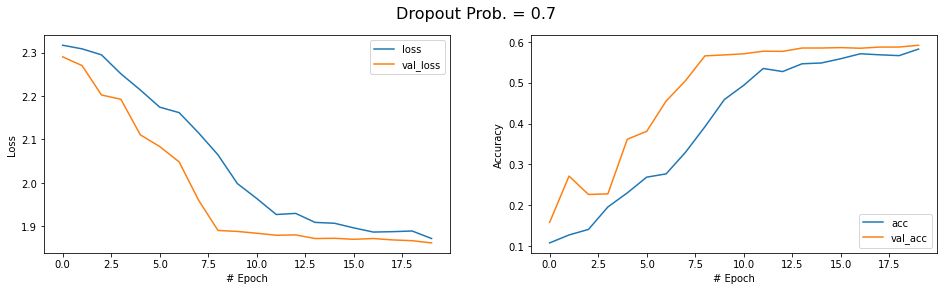

In [18]:
plt.figure(figsize=(16,4))
plt.suptitle('Dropout Prob. = 0.7', fontsize=16)
plt.subplot(1,2,1)
plt.plot(h_drop_70_model.history['loss'], label='loss')
plt.plot(h_drop_70_model.history['val_loss'], label='val_loss')
# plt.ylim(1.5, 1.73)
plt.xlabel('# Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper right')

plt.subplot(1,2,2)
plt.plot(h_drop_70_model.history['accuracy'], label='acc')
plt.plot(h_drop_70_model.history['val_accuracy'], label='val_acc')
# plt.ylim(0.7, 0.95)
plt.xlabel('# Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')

##### Compare val_accuray of each dropout.

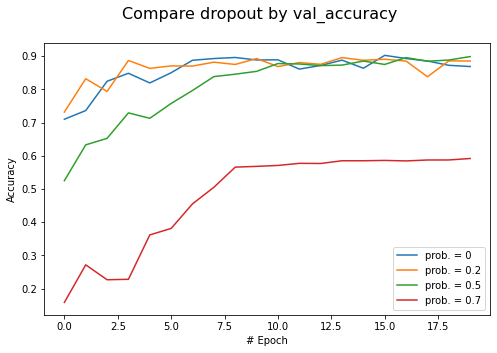

In [21]:
plt.figure(figsize=(8,5))
plt.suptitle('Compare dropout by val_accuracy', fontsize=16)
plt.plot(h_default_model.history['val_accuracy'], label='prob. = 0')
plt.plot(h_drop_20_model.history['val_accuracy'], label='prob. = 0.2')
plt.plot(h_drop_50_model.history['val_accuracy'], label='prob. = 0.5')
plt.plot(h_drop_70_model.history['val_accuracy'], label='prob. = 0.7')
# plt.ylim(0.7, 0.95)
plt.xlabel('# Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')

### **Homework 2.2 ทำ Data augmentation และดู Performance ของการ train และ test**

##### generate augmented data

In [22]:
# Data augmentation generator (model)
data_augmentation = tf.keras.Sequential([
  keras.layers.experimental.preprocessing.RandomRotation((-0.08, 0.08)),
  keras.layers.experimental.preprocessing.RandomZoom((-0.25, 0.25), (-0.25, 0.25))
])

In [23]:
# 2 times number of data
added_X_train = np.concatenate((X_train_2000, X_train_2000), axis=0)
added_y_train = np.concatenate((y_train_2000, y_train_2000), axis=0)

In [24]:
print(added_X_train.shape)
print(added_y_train.shape)

(4000, 28, 28)
(4000,)


In [25]:
expanded_images = tf.expand_dims(added_X_train, axis=-1) # (10000, 28, 28) -> (10000, 28, 28, 1)
print(expanded_images.shape)

(4000, 28, 28, 1)


In [27]:
samples, h, w, channel = expanded_images.shape
aug_images = data_augmentation(expanded_images)
aug_images = np.reshape(aug_images, (samples, h, w))
print(aug_images.shape)

(4000, 28, 28)


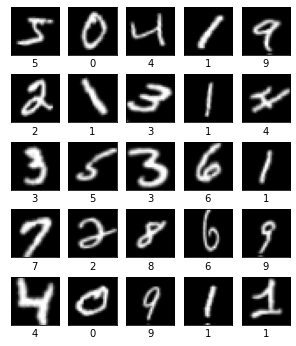

In [28]:
plt.figure(figsize=(5,6))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(aug_images[i], cmap=plt.cm.gray)
    plt.xlabel(added_y_train[i])

In [29]:
new_aug_images = np.where(aug_images > 0.5, aug_images, 0)

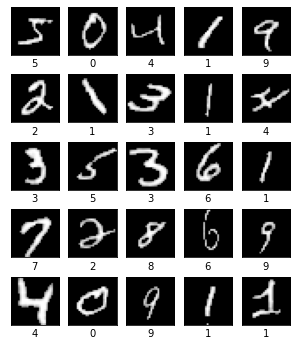

In [30]:
plt.figure(figsize=(5,6))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(new_aug_images[i], cmap=plt.cm.gray)
    plt.xlabel(added_y_train[i])

##### build and train model

In [31]:
aug_X_train = np.concatenate((X_train_2000, new_aug_images), axis=0)
aug_y_train = np.concatenate((y_train_2000, added_y_train), axis=0)

print(aug_X_train.shape)
print(aug_y_train.shape)

(6000, 28, 28)
(6000,)


In [32]:
print(np.amax(aug_X_train))

1.0


In [33]:
aug_model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(512, activation='relu'),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(512, activation='relu'),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(512, activation='relu'),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(10, activation='softmax')
])

aug_model.compile(optimizer='adam',
                      loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True),
                      metrics=['accuracy'])

In [34]:
h_aug_model = aug_model.fit(aug_X_train, aug_y_train, epochs=20, validation_data=(X_test, y_test))

Epoch 1/20
188/188 [==============================] - 1s 6ms/step - loss: 1.9130 - accuracy: 0.5507 - val_loss: 1.7453 - val_accuracy: 0.7126
Epoch 2/20
188/188 [==============================] - 1s 5ms/step - loss: 1.7432 - accuracy: 0.7202 - val_loss: 1.6269 - val_accuracy: 0.8348
Epoch 3/20
188/188 [==============================] - 1s 5ms/step - loss: 1.6708 - accuracy: 0.7907 - val_loss: 1.6034 - val_accuracy: 0.8577
Epoch 4/20
188/188 [==============================] - 1s 6ms/step - loss: 1.6520 - accuracy: 0.8088 - val_loss: 1.5954 - val_accuracy: 0.8650
Epoch 5/20
188/188 [==============================] - 1s 5ms/step - loss: 1.6205 - accuracy: 0.8400 - val_loss: 1.5829 - val_accuracy: 0.8784
Epoch 6/20
188/188 [==============================] - 1s 5ms/step - loss: 1.6142 - accuracy: 0.8455 - val_loss: 1.6231 - val_accuracy: 0.8380
Epoch 7/20
188/188 [==============================] - 1s 6ms/step - loss: 1.6187 - accuracy: 0.8425 - val_loss: 1.6620 - val_accuracy: 0.7995
Epoch 

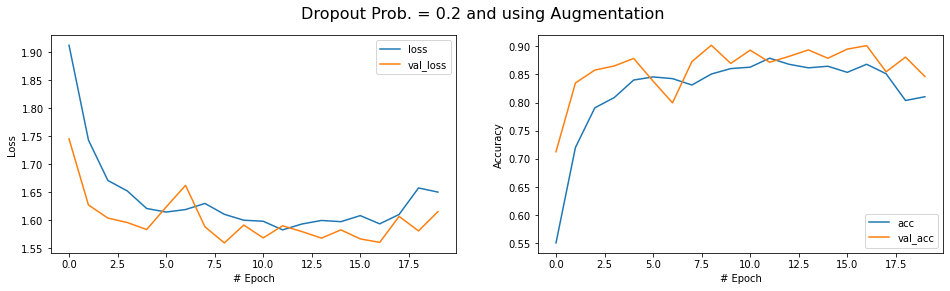

In [35]:
plt.figure(figsize=(16,4))
plt.suptitle('Dropout Prob. = 0.2 and using Augmentation', fontsize=16)
plt.subplot(1,2,1)
plt.plot(h_aug_model.history['loss'], label='loss')
plt.plot(h_aug_model.history['val_loss'], label='val_loss')
plt.xlabel('# Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper right')

plt.subplot(1,2,2)
plt.plot(h_aug_model.history['accuracy'], label='acc')
plt.plot(h_aug_model.history['val_accuracy'], label='val_acc')
plt.xlabel('# Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')